# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [24]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [25]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [27]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [28]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [29]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [30]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [31]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [32]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [33]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [34]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [35]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [36]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [37]:
data.duplicated().sum()

54

In [38]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [39]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [40]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [41]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [42]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [43]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [44]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Чтобы посчитать есть ли зависимость между количеством детей и возвратом кредита в срок, решил вычислить конверсию для каждой группы заемщиков в зависимости от количества у них детей, т.е.процент заемщиков имевших ранее задолженность по отношению к общему количеству заемщиков в своей группе. Потом сравню полученные показатели.

In [45]:
data.groupby('children')['children'].count() # сначала смотрю общую информацию количества кредитов для каждой группы заемщиков

children
0    14107
1     4809
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Делаю тестовый расчет конверсии для группы заемщиков без детей. Изначально нам известно,что в столбце `debt` всего 2 катеогории людей, у которых не было пропусков `0` и у которых были пропущены платежи `1`

In [46]:
without_child_debt_all = data[data['children'] == 0]['debt'].count()
without_child_debt_1 = data[(data['children'] == 0) & 
                            (data['debt'] == 1)]['children'].count()
without_child_convers = without_child_debt_1 / without_child_debt_all * 100
without_child_convers

7.535266179910682

In [47]:
def converse_debt_children(children): # cоздаю функцию для вычисления конверсии
    debt_0 = data[data['children'] == children]['debt'].count()
    debt_1 = data[(data['children'] == children) & (data['debt'] == 1)]['children'].count()
    converse = debt_1 / debt_0 * 100
    return converse

Создаю цикл,который вычислит конверсию для каждой группы, помещаю результаты в переменную `converse_childrens`, а количество детей в `count_childrens`:

In [48]:
count_childrens = []
converse_childrens = []
for child in data.sort_values('children', ascending=True)['children'].unique():
    if child not in count_childrens:
        count_childrens.append(child)
        converse_childrens.append(converse_debt_children(child))

In [49]:
import seaborn #импортирую библиотеку seaborn

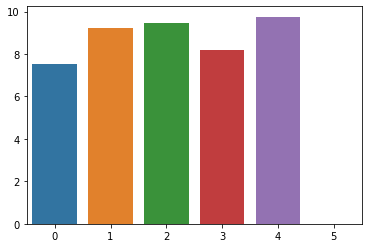

In [51]:
seaborn.barplot(x=count_childrens, y=converse_childrens); #создаю столбчатую диаграмму,чтобы посомтреть зависимость

**Вывод:** Исходя из полученных данных можно сделать вывод,что зависимость между количеством детей и возвратом кредита в срок, пусть и незначительная действительно наблюдается. ЗОсобенно это хорошо видно на первых трех столбцах, где виден рост количества людей с проблемами платежей по кредиту. Для заемщиков с детьми большая вероятность того,что они не смогут вернуть кредит в срок. В группах с количеством детей 3 и 4, таких людей тоже больше, чем в группе где нет детей. Но если судить по общей информации, в этих группах не очень много заемщиков, и конверсия непоказательна, я считаю. В группе с 5 детьми не было просрочек вообще, но в этой группе всего 9 человек, и делать какие то выводы по ней нет смысла. 

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Чтобы ответить на этот вопрос посчитаю конверсию для каждой категории семейного положения: соотношение тех,у кого были проблемы с платежами, к общему количеству заемщиков своей группе.

In [52]:
data['family_status'].unique() #смотрю какие категории вообще есть в наших данных

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [53]:
data['family_status_id'].unique() # также каждой категории семейного положения присвоен свой `ID`.Смотрю какие есть и сравниваю
                                  # с количеством категорий

array([0, 1, 2, 3, 4])

Группирую столбцы `family_status` и `family_status_id` по количеству заемщиков в каждой категории:

In [54]:
data.groupby('family_status')['family_status'].count().sort_values()

family_status
вдовец / вдова             951
в разводе                 1189
Не женат / не замужем     2796
гражданский брак          4146
женат / замужем          12266
Name: family_status, dtype: int64

In [55]:
data.groupby('family_status_id')['family_status'].count().sort_values()

family_status_id
2      951
3     1189
4     2796
1     4146
0    12266
Name: family_status, dtype: int64

Я сразу отсортировал по количеству,чтобы проще было сравнить. Количество совпадает, а значит мы можем определить,какой `ID` у каждой категории семейного положения:
`0` - женат / замужем;
`1` - гражданский брак;
`2` - вдовец / вдова;
`3` - в разводе;
`4` - Не женат / не замужем.

In [56]:
def converse_debt_family_status(family_status): # функция для подсчета конверсии
    debt_0 = data[data['family_status_id'] == family_status]['debt'].count()
    debt_1 = data[(data['family_status_id'] == family_status) & (data['debt'] == 1)]['children'].count()
    converse = debt_1 / debt_0 * 100
    return converse

Создаю цикл,который вычислит конверсию для каждой группы, помещаю результаты в переменную `converse_family_status` :

In [57]:
converse_family_status = []
for status_id in data.sort_values('family_status_id', ascending=True)['family_status_id'].unique():
    count_family_status_id = []
    if status_id not in count_family_status_id:
        count_family_status_id.append(status_id)
        converse_family_status.append(converse_debt_family_status(status_id))

In [58]:
family_status_text = ['женат / замужем', 'гражданский брак', 'вдовец / вдова', 'в разводе', 'не женат / не замужем']
# т.к. нам известен порядок размещения ID для категорий семейного положения, создаю переменную со значениями для оси Y

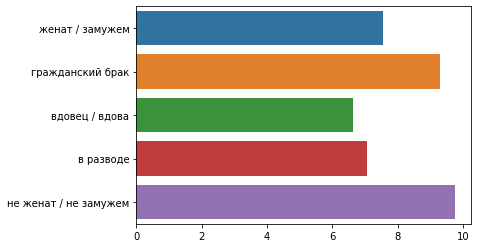

In [60]:
seaborn.barplot(x=converse_family_status, y=family_status_text); # отображаю результат

**Вывод:** На основании полученных данных можно сказать,что наблюдается некоторая зависимость. Сложности с возвратом кредита в срок могут с большей вероятностью могут возникнуть у заемщиков из категорий "гражданский брак" и "не женат/не замужем" по сравнению с остальными категориями заемщиков. Отдельно стоит отметить самую многочисленную катеогорию заемщиков "женат/замужем", вероятность не отдать кредит в срок составляет чуть больше ~7,5%, что в целом сравнимо с показателями наименее рисковых групп.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

С учетом того, что доход каждого из заемщиков был рапределен по категориям, высчитаем конверсию для каждой из них.

In [61]:
data.groupby('total_income_category')['total_income_category'].count() # смотрю количество заемщиков в каждой группе

total_income_category
A       25
B     5014
C    15938
D      349
E       22
Name: total_income_category, dtype: int64

In [62]:
sort_category_total_income = data.sort_values('total_income_category', ascending=True)['total_income_category'].unique()
sort_category_total_income
# возможно это переменная лишшняя, но я перестраховался, чтобы не допутстить ошибки в сортировке групп выраженными
# буквенными значениями

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [63]:
def converse_debt_total_income(category_income): # функция для вычисления конверсии
    debt_0 = data[data['total_income_category'] == category_income]['debt'].count()
    debt_1 = data[(data['total_income_category'] == category_income) & (data['debt'] == 1)]['total_income_category'].count()
    converse = debt_1 / debt_0 * 100
    return converse

In [64]:
list_total_income_category = [] # вычисляю конверсию для каждой категории
converse_total_income_category = []
for category in sort_category_total_income:
    if category not in list_total_income_category:
        list_total_income_category.append(category)
        converse_total_income_category.append(converse_debt_total_income(category))

<AxesSubplot:>

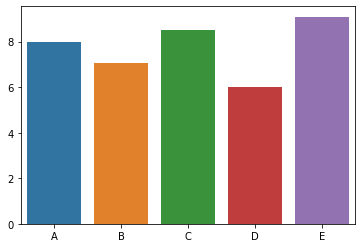

In [65]:
seaborn.barplot(x=list_total_income_category, y=converse_total_income_category) #сравниваю полученные результаты

**Вывод:** С учетом полученной информации, самая многочисленная группа заемщиков в столбце `C`, которую можно охарактеризовать как людей со средним доходом показывает потенциально большую вероятность просрока кредита, чем соседние группы с большим и меньшим доходом. Столбцы `A` и `C` из-за малого количества людей в ней, учитывать не стоит. ПОэтому можно сказать,что зависимости между уровнем дохода и возвратом кредита в срок нет.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

Для ответа на этот вопрос посчитаю конверсию для каждой категории целей кредита для заемщиков, у которых была просрочка платежа.

In [66]:
data['purpose_category'].unique() # вывожу категории целей кредита

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [67]:
def categorize_id_purpose(row): # создаю функцию для присвоения ID к категориям целей кредита
    if row == 'операции с недвижимостью':
        return '0'
    elif row == 'операции с автомобилем':
        return '1'
    elif row == 'получение образования':
        return '2'
    elif row == 'проведение свадьбы':
        return '3'

In [68]:
data['purpose_category_id'] = data['purpose_category'].apply(categorize_id_purpose)
#создаю колонку с ID категорий

In [69]:
def converse_debt_purpose_category(category_purpose): # создаю функцию для вычисления конверсии
    debt_0 = data[data['purpose_category_id'] == category_purpose]['debt'].count()
    debt_1 = data[(data['purpose_category_id'] == category_purpose) & (data['debt'] == 1)]['purpose_category_id'].count()
    converse = debt_1 / debt_0 * 100
    return converse

In [70]:
converse_purpose_category_id = [] # создаю цикл, для вычисления конвесрии по каждой группе
for purpose_id in data.sort_values('purpose_category_id', ascending=True)['purpose_category_id'].unique():
    count_purpose_category_id = []
    if purpose_id not in count_purpose_category_id:
        count_purpose_category_id.append(purpose_id)
        converse_purpose_category_id.append(converse_debt_purpose_category(purpose_id))

<AxesSubplot:>

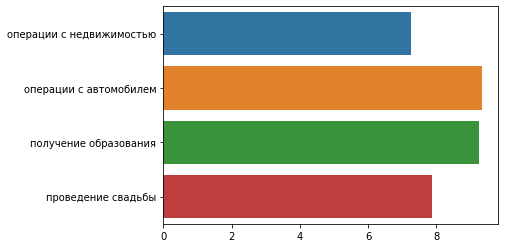

In [71]:
text_category_id = ['операции с недвижимостью', 'операции с автомобилем', 'получение образования', 'проведение свадьбы']
# # т.к. нам известен порядок размещения ID для категорий целей кредита, создаю переменную со значениями для оси Y
seaborn.barplot(x=converse_purpose_category_id, y=text_category_id); # сраавниваю полученный результат

**Вывод:** Из полученных данных можно увидеть, что кредиты на "операции с недвижимостью" и "проведение свадьбы" закроют в срок с большей вероятностью.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* **Первая причина.** Как видно из информации файла, пропусков равное количество в столбцах с трудовым стажем и общим доходом заемщиков. Возможно для этой суммы кредита или статуса заемщика не требовались эти данные. Так же видно, что абсолютное большинство заещиков без просрочек по кредиту, а те, у кого есть просрочка большинство относятся к категории сотрудники.\
**Вторая причина.** Зарплатные клиенты.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Медианные значения позволяют отсечь аномально высокие или низкие данные, чтобы они не брались во внимание при подсчетах.

## Общий вывод.

На основании полученых данных, с учетом всех выявленных зависимостей можно категории менее или более рисковых заёмщиков, на основании которых можно выдавать кредит, так же эти категории позволят определить процентную ставку и сумму кредита. Чтоб покрыть риски ставка соответственно будет больше, и меньше сумма которую можно взять в кредит.